In [2]:
# Homogenous Linear equation fitting example using SVD decomposition
# Original MATLAB code and example explained:
    # Author: Andrew Gibiansky
    # Source: https://andrew.gibiansky.com/blog/mathematics/cool-linear-algebra-singular-value-decomposition/
    # Date: 5/29/2013

    # Rewritten in Python by: Irina Gasilova
    # Date: 4/8/2025

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Generate some points around a line
intercept = -10
slope = 3
npts = 50
noise = 80

np.random.seed(0)  # For reproducibility
xs = 10 + np.random.rand(npts, 1) * 90
ys = slope * xs + intercept + np.random.rand(npts, 1) * noise

Text(0, 0.5, 'y')

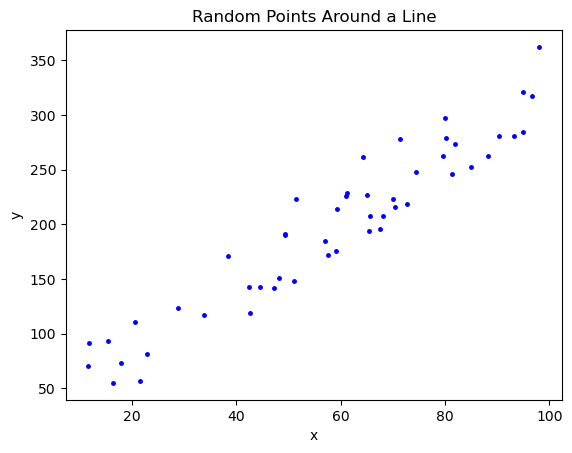

In [8]:
# Plot the randomly generated points
plt.figure()
plt.plot(xs, ys, 'b.', markersize=5)
plt.title("Random Points Around a Line")
plt.xlabel("x")
plt.ylabel("y")

In [10]:
# Fit these points to a line using SVD
# Construct matrix A where each row is [x_i, y_i, -1]
# This corresponds to the general line equation: ax + by + c = 0
# We are solving for the vector [a, b, c] that best fits all points (x, y)
A = np.hstack((xs, ys, -1 * np.ones((npts, 1))))

# Perform Singular Value Decomposition on matrix A
# This decomposes A into U * S * V^T
# Vt is the transpose of V, and its rows are the right singular vectors
U, S, Vt = np.linalg.svd(A)

# The solution [a, b, c] lies in the null space of A
# The solution to A*v = 0 (in the least squares sense) is the right singular vector
# The vector corresponding to the smallest singular value gives the best approximation
# The last row of Vt corresponds to the smallest singular vector (SVD sorts them)
# Normally we use Vt[-1] if we're looking for the null space vector (ax + by + c = 0)
fit1 = Vt[-1, :]

In [12]:
def plot_svd_fit(xs, ys, fit, label='Fitted Line', color='r'):
    """
    Plot the data points and a fitted line from SVD vector [a, b, c].
    
    Parameters:
        xs (array-like): x-values of the data points
        ys (array-like): y-values of the data points
        fit (array-like): [a, b, c] coefficients from SVD
        label (str): label for the line in legend
        color (str): color of the fitted line
    """
    a, b, c = fit

    # Convert to slope-intercept form: y = mx + i
    slope_est = -a / b
    intercept_est = -c / b

    # Estimate y values using the fitted line
    ys_est = slope_est * xs + intercept_est

    # Plot the original points and fitted line
    plt.figure()
    plt.plot(xs, ys, 'b.', markersize=5, label='Data')
    plt.plot(xs, ys_est, color=color, label=label)
    plt.title("SVD Line Fit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

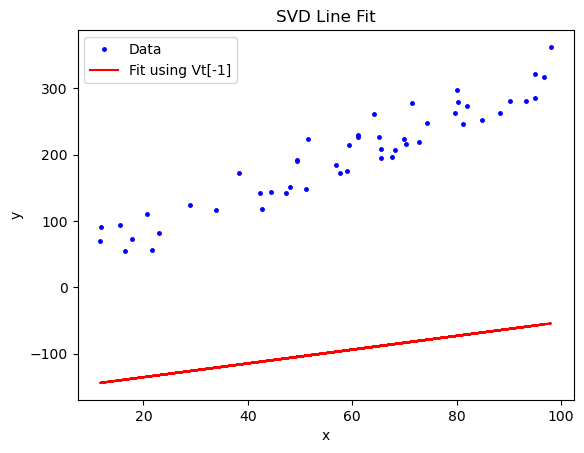

In [14]:
# Let's plot pure-least square solution choosing the last vector
plot_svd_fit(xs, ys, fit1, label='Fit using Vt[-1]', color='r')

Here let's stop for a bit and discuss why the choise of the last singular value and the corresponding Vt vector gave a bad approximation. 

Theoretically, the last singular vector (corresponding to the smallest singular value) gives the best solution to the homogeneous system A*v = 0 in the least square sense. But sometimes it can sometimes result in a poor line fit, especially when working with real-world noisy data. Here are some reasons for that:

-That smallest singular vector may be heavily influenced by noise, especially if the smallest singular value is close to zero or not well-separated from the others. If the smallest singular values are both small, and there's no strong separation between them, the second-to-last vector might represent the actual best direction for fitting — the last might be overfitting fine-grain noise.

-If your data doesn't lie perfectly on a line (and it rarely does in real data), then the vector Vt[-1] might overfit the noise, resulting in an unstable or uninformative direction.

-In such cases, the second-to-last singular vector might better capture the true geometric structure of the point cloud.

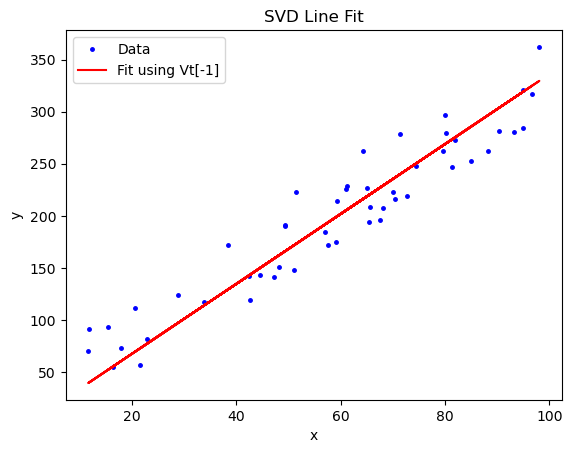

In [16]:
# Let's choose second-to-last singular value:
fit2 = Vt[-2, :]

# And plot the corresponding fittel line
plot_svd_fit(xs, ys, fit2, label='Fit using Vt[-1]', color='r')

We can see here the the second-to-last vector is what we are looking for.

You can try both Vt[-1] and Vt[-2] and compare residual errors (sum of squared differences between predicted and actual y values). Whichever gives a lower residual is likely a better choice. Or you can use robust fitting methods (like RANSAC) when fitting lines to noisy data.

In [19]:
def compute_residual(xs, ys, fit):
    a, b, c = fit
    ys_pred = (-a * xs - c) / b
    return np.sum((ys_pred - ys)**2)

res1 = compute_residual(xs.flatten(), ys.flatten(), fit1)
res2 = compute_residual(xs.flatten(), ys.flatten(), fit2)

print(f"Residual for Vt[-1] (smallest singular vector): {res1:.2f}")
print(f"Residual for Vt[-2] (second-to-last singular vector): {res2:.2f}")

Residual for Vt[-1] (smallest singular vector): 4444533.89
Residual for Vt[-2] (second-to-last singular vector): 32594.82
